working_Set = [3, 0]
multipliers , d0 = [[-0.02439]] [[-1.09756]
 [ 0.87805]]
working_Set = [3, 0]
multipliers , d0 = [[-0.02439]] [[-0.38328]
 [ 0.30662]]
[array([[ 1],
       [-1]]), array([[ 0.28571],
       [-0.42857]]), array([[ 0.28571],
       [-0.42857]])]


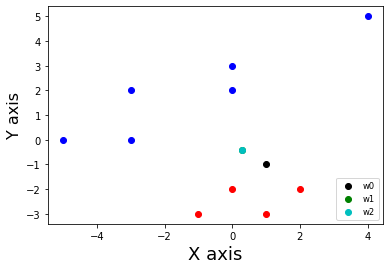

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

np.set_printoptions(precision=5)

## Returns lagrange multipliers and d0 obtained after minimizing with respect to d
def get_lambda(w0,working_set,data):
    if len(working_set)==0:
        
        return
    
    yi = data[working_set[0],2]
    xi = data[working_set[0],0:2]
    X = np.zeros((len(working_set),2))
    
    for r in range(0,len(working_set)):
        
        yi = data[working_set[r],2]
        xi = data[working_set[r],0:2]
        X[r] = yi*xi
        
    XXT_inv = np.linalg.inv(np.dot(X,X.T))
    lagrange_mutliplier = -np.dot(XXT_inv,np.dot(X,w0))
    d0 = -w0 - np.dot(X.T,lagrange_mutliplier)
    d0 = d0.reshape(2,1)
    
    return lagrange_mutliplier,d0

## adds blocking constraint
def add_blocking_constraint(d0,data,w0):
    nrows = np.shape(data)[0]
    temp = math.inf
    for i in range(nrows):
        
        yi = data[i,2]
        xi = data[i,0:2]
        xi = xi.reshape(1,2)
        if yi*np.dot(xi,d0)<0:
            if temp > (1-yi*np.dot(xi,w0))/(yi*np.dot(xi,d0)):
                blocking_constraint = i
                temp = (1-yi*np.dot(xi,w0))/(yi*np.dot(xi,d0))
        if temp > 1:
            return 1, -1
        else:
            return temp,blocking_constraint

## obtain working set at given point
def get_working_set(data,w):
    nrows = np.shape(data)[0]
    working_set = []
    for i in range(nrows):
        if data[i,2]*np.dot(data[i,0:2],w) - 1 ==0:
            working_set.append(i)
    return working_set

## active set algorithm
def active_set(data,w0):
    
    working_set =  get_working_set(data,w0)
    #print(working_set)
    w = w0 
    iterates = [w0]
    iters = 0
    flag = 0 
    
    while iters < 2 :
        
        multipliers,d0 = get_lambda(w,working_set,data)
        if np.linalg.norm(d0) > 1e-7: ## if d0 == 0
            step_size,blocking_constraint = add_blocking_constraint(d0,data,w)
            if blocking_constraint!=-1:
                working_set.append(blocking_constraint)
            w = w + step_size*d0
        else:
            for i in range(np.shape(multipliers)[0]):
                if multipliers[i,0] < 0:
                    del working_set[i] ## remove constraint whose lagrange multiplier is negative
                    flag = 1
                    break
            if flag != 1:
                return w
            else:
                
                multipliers,d0 = get_lambda(w,working_set,data) ## get d0 aftter minimizing wrt to new working set
                if blocking_constraint != -1:
                    working_set.append(blocking_constraint)
                w = w + step_size*d0
        print('working_Set = ',end='')
        print(working_set)
        step_size,blocking_constraint = add_blocking_constraint(d0,data,w)
        print('multipliers , d0 = ',end = '')
        print(np.asarray(multipliers),np.asarray(d0))
        iterates.append(w)
        iters += 1
        
    return iterates
                   
dataset = pd.read_csv('a4q1.csv',header = None)
data = dataset.to_numpy()
data = data.T
#print(data)
[nrows,ncols] = np.shape(data)
w0 = np.array([1,-1])
w0 = w0.reshape(2,1)
fig = plt.figure()
plt.xlabel('X axis', fontsize=18)
plt.ylabel('Y axis', fontsize=16)
for i in range(nrows):
    if data[i,2] == 1:
        plt.scatter(data[i,0],data[i,1],color = 'red')
    else:
        plt.scatter(data[i,0],data[i,1],color = 'blue')




#plt.xticks(np.arange(-5,5))
#plt.yticks(np.arange(-10,10))

iterates = active_set(data,w0)
print(iterates)
colors = ['black','green','c']
plt.scatter(w0[0,0],w0[1,0],color = 'black',label = 'w0')
plt.scatter(iterates[1][0,0],iterates[1][1,0],color = colors[1],label = 'w%d'%(1))
plt.scatter(iterates[2][0,0],iterates[2][1,0],color = colors[2],label = 'w%d'%(2))
plt.legend(loc='lower right', fontsize='small')
plt.show()
fig.savefig('partc.jpg')


### 